In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("Ads_Optimisation.csv")

In [4]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
import random 
N=10000
d=10
ads_selected=[]
total_reward=0
for n in range (0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=data.values[n, ad]
    total_reward=total_reward+reward

In [6]:
pd.Series(ads_selected).tail(10000).value_counts(normalize=True)

2    0.1064
4    0.1035
9    0.1021
5    0.1014
7    0.1012
8    0.1003
0    0.0982
3    0.0973
6    0.0955
1    0.0941
dtype: float64

In [7]:
pd.Series(ads_selected).head(10000).value_counts(normalize=True)

2    0.1064
4    0.1035
9    0.1021
5    0.1014
7    0.1012
8    0.1003
0    0.0982
3    0.0973
6    0.0955
1    0.0941
dtype: float64

In [8]:
data.shape

(10000, 10)

In [9]:
pd.Series(ads_selected).tail(10000).value_counts(normalize=False)

2    1064
4    1035
9    1021
5    1014
7    1012
8    1003
0     982
3     973
6     955
1     941
dtype: int64

In [10]:
pd.Series(ads_selected).head(10000).value_counts(normalize=False)

2    1064
4    1035
9    1021
5    1014
7    1012
8    1003
0     982
3     973
6     955
1     941
dtype: int64

In [11]:
import math
N=10000
d=10
ads_selected=[]
numbers_of_selections=[0]*d
sums_of_reward=[0]*d
total_rewards=0

In [12]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):        
            average_reward = sums_of_reward[i] / numbers_of_selections[i]           
            di = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])           
            upper_bound = average_reward + di
            
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
   
    ads_selected.append(ad) 
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n, ad]
    sums_of_reward[ad] = sums_of_reward[ad] + reward
    total_reward = total_reward + reward

In [13]:
pd.Series(ads_selected).head(10000).value_counts(normalize=True)

4    0.6323
7    0.1170
0    0.0705
1    0.0387
3    0.0345
6    0.0292
8    0.0256
2    0.0186
9    0.0186
5    0.0150
dtype: float64

In [16]:
pd.Series(ads_selected).tail(10000).value_counts(normalize=True)

4    0.6323
7    0.1170
0    0.0705
1    0.0387
3    0.0345
6    0.0292
8    0.0256
2    0.0186
9    0.0186
5    0.0150
dtype: float64

In [18]:
import matplotlib.pyplot as plt

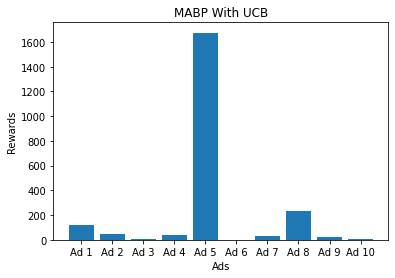

In [29]:
plt.bar(['Ad 1','Ad 2','Ad 3','Ad 4','Ad 5','Ad 6','Ad 7','Ad 8','Ad 9','Ad 10'],sums_of_reward)
plt.title('MABP With UCB')
plt.xlabel('Ads')
plt.ylabel('Rewards')
plt.show()

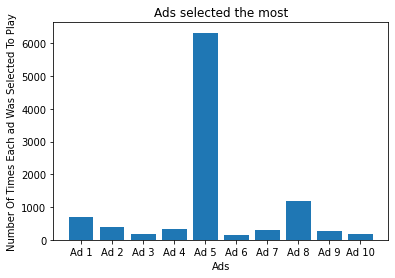

In [28]:
plt.bar(['Ad 1','Ad 2','Ad 3','Ad 4','Ad 5','Ad 6','Ad 7','Ad 8','Ad 9','Ad 10'],numbers_of_selections)
plt.title('Ads selected the most')
plt.xlabel('Ads')
plt.ylabel('Number Of Times Each ad Was Selected To Play')
plt.show()

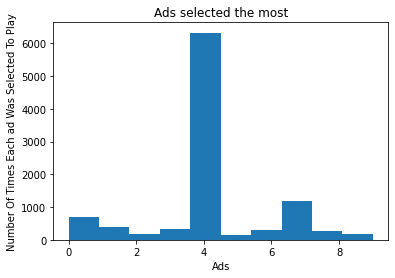

In [33]:
plt.hist(ads_selected)
plt.title('Ads selected the most')
plt.xlabel('Ads')
plt.ylabel('Number Of Times Each ad Was Selected To Play')
plt.show()